In [62]:
# standard libraries
import pandas as pd
import numpy as np
import operator
import math
import os
import random

# visualizations
import matplotlib.pyplot as plt
import plotly.express as px
from mlxtend.plotting import scatterplotmatrix
import seaborn as sns
from IPython.display import Image
%matplotlib inline

# tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from keras import metrics
from tensorflow import keras
from tensorflow.keras import initializers

# sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

#classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

#for manually define MajorityVoting classifier
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
from sklearn.pipeline import Pipeline

In [2]:
# !pip install fastparquet

## 1. load data

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [8]:
teoh_data = "../data/Teoh/Flight Summary - North Atlantic - 2019.pq"
df_original = pd.read_parquet(teoh_data)
df_original

,ICAO Aircraft type designator,First known waypoint time (UTC),Last known waypoint time (UTC),Direction,Total flight dist (km),Total fuel burn (kg),Mean overall propulsion efficiency,Aircraft mass mean (kg),Mean nvPM number EI (kg-1),Initial contrail length (km),First contrail waypoint time (UTC),Last contrail waypoint time (UTC),"RHi initial, Mean","RHi initial, Stdev","RHi lifetime, Mean","Temp initial, Mean (K)","Temp initial, Stdev (K)","Temp SAC, Mean (K)","Temp SAC, Stdev (K)",Persistent contrail length (km),"Contrail altitude initial, Mean (ft)","Contrail altitude lifetime, Mean (ft)","Contrail age, Mean (h)","Contrail age, Max (h)","Ice number initial, Mean (m-1)","Ice number initial, Stdev (m-1)","Ice number lifetime, Mean (m-1)","Ice vol mean radius, Mean (um)","Tau contrail, Mean","Tau cirrus, Mean",RF SW (W m-2),RF LW (W m-2),RF Net (W m-2),Total contrail EF (J),SDR mean (W m-2),RSR mean (W m-2),OLR mean (W m-2)
0,B772,2019-01-01 02:17:49,2019-01-01 05:18:26,E,2633.994219,23991.530999,0.311201,228553.082349,4.920940e+14,1415.515126,None,None,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
1,B763,2019-01-01 02:19:06,2019-01-01 05:27:55,E,2670.997754,13886.660380,0.325782,150812.984413,1.425808e+15,1701.125144,2019-01-01 03:57:00,2019-01-01 05:27:55,1.079427,0.095837,1.090244,213.532187,0.195622,224.165862,0.689557,536.746493,35000.000000,34730.969825,4.587508,9.044444,3.968575e+12,1.091993e+12,3.152803e+12,3.716948,0.090483,0.001725,-0.565425,4.231059,3.665634,1.515245e+14,36.862724,15.583469,238.200396
2,B763,2019-01-01 02:21:40,2019-01-01 05:11:34,E,2388.740516,13397.610853,0.304915,150872.338643,1.172578e+15,2388.740516,None,None,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
3,B744,2019-01-01 02:16:31,2019-01-01 05:44:38,E,3039.310160,38210.558395,0.317271,311350.241271,5.589923e+14,2216.876721,None,None,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
4,B789,2019-01-01 03:15:00,2019-01-01 04:30:15,E,1092.545055,9686.423444,0.282729,212017.428561,8.404441e+14,1092.545055,None,None,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477918,B763,2019-12-31 00:38:04,2019-12-31 02:56:54,E,2087.017297,10207.228653,0.321702,152685.927840,1.135276e+15,2087.017297,2019-12-31 00:38:04,2019-12-31 01:53:00,1.090726,0.108395,1.116687,210.201732,0.163783,223.415738,0.453072,1125.965753,37000.000000,37154.083442,8.579962,13.532222,4.719248e+12,7.926230e+11,3.184250e+12,7.428535,0.081363,0.090032,-0.137038,4.689946,4.552907,2.226959e+15,20.154910,8.090933,219.566534
477919,B748,2019-12-31 23:31:06,2020-01-01 02:25:41,E,2606.391287,28388.405476,0.352150,358167.013695,2.394486e+14,2606.391287,2019-12-31 23:31:06,2020-01-01 02:25:41,1.049879,0.116941,1.076081,210.874679,1.240604,224.607408,0.607586,940.083535,35000.000000,35441.620271,6.743272,9.582778,1.755778e+12,4.786200e+11,1.494661e+12,10.035975,0.084320,0.177454,-0.008752,3.328687,3.319935,5.025183e+14,2.267464,1.518795,166.905632
477920,A333,2019-12-31 23:37:19,2020-01-01 02:30:19,E,2548.921249,14514.808022,0.314231,180359.996557,1.204005e+15,2548.921249,2019-12-31 23:37

In [69]:
df_original.columns.values

array(['ICAO Aircraft type designator', 'First known waypoint time (UTC)',
       'Last known waypoint time (UTC)', 'Direction',
       'Total flight dist (km)', 'Total fuel burn (kg)',
       'Mean overall propulsion efficiency', 'Aircraft mass mean (kg)',
       'Mean nvPM number EI (kg-1)', 'Initial contrail length (km)',
       'First contrail waypoint time (UTC)',
       'Last contrail waypoint time (UTC)', 'RHi initial, Mean',
       'RHi initial, Stdev', 'RHi lifetime, Mean',
       'Temp initial, Mean (K)', 'Temp initial, Stdev (K)',
       'Temp SAC, Mean (K)', 'Temp SAC, Stdev (K)',
       'Persistent contrail length (km)',
       'Contrail altitude initial, Mean (ft)',
       'Contrail altitude lifetime, Mean (ft)', 'Contrail age, Mean (h)',
       'Contrail age, Max (h)', 'Ice number initial, Mean (m-1)',
       'Ice number initial, Stdev (m-1)',
       'Ice number lifetime, Mean (m-1)',
       'Ice vol mean radius, Mean (um)', 'Tau contrail, Mean',
       'Tau cirrus, Mean

In [17]:
print(df_original.isnull().sum())  #no NA except contrail waypoint timestamps

ICAO Aircraft type designator                 0
First known waypoint time (UTC)               0
Last known waypoint time (UTC)                0
Direction                                     0
Total flight dist (km)                        0
Total fuel burn (kg)                          0
Mean overall propulsion efficiency            0
Aircraft mass mean (kg)                       0
Mean nvPM number EI (kg-1)                    0
Initial contrail length (km)                  0
First contrail waypoint time (UTC)       210847
Last contrail waypoint time (UTC)        210847
RHi initial, Mean                             0
RHi initial, Stdev                            0
RHi lifetime, Mean                            0
Temp initial, Mean (K)                        0
Temp initial, Stdev (K)                       0
Temp SAC, Mean (K)                            0
Temp SAC, Stdev (K)                           0
Persistent contrail length (km)               0
Contrail altitude initial, Mean (ft)    

### sample & split data to process on local

In [13]:
selected_columns = ['Total flight dist (km)', 
                    'Total fuel burn (kg)',
                    'Mean overall propulsion efficiency', 
                    'Aircraft mass mean (kg)',
                    'Mean nvPM number EI (kg-1)', 
                    'Initial contrail length (km)',
                    'RHi initial, Mean',
                    'RHi lifetime, Mean',
                    'Temp initial, Mean (K)', 
                    'Temp SAC, Mean (K)', 
                    'Persistent contrail length (km)',
                    'Contrail altitude initial, Mean (ft)',
                    'Contrail altitude lifetime, Mean (ft)', 
                    'Contrail age, Mean (h)',
                    'Ice number initial, Mean (m-1)',
                    'Ice number lifetime, Mean (m-1)',
                    'Ice vol mean radius, Mean (um)', 
                    'Tau contrail, Mean',
                    'Tau cirrus, Mean', 
                    'RF SW (W m-2)', 
                    'RF LW (W m-2)',
                    'RF Net (W m-2)', 
                    'Total contrail EF (J)', 
                    'SDR mean (W m-2)',
                    'RSR mean (W m-2)', 
                    'OLR mean (W m-2)']
df_selected = df_original[selected_columns]  #excl aircraft type/timestamps/std cols
df_selected

,Total flight dist (km),Total fuel burn (kg),Mean overall propulsion efficiency,Aircraft mass mean (kg),Mean nvPM number EI (kg-1),Initial contrail length (km),"RHi initial, Mean","RHi lifetime, Mean","Temp initial, Mean (K)","Temp SAC, Mean (K)",Persistent contrail length (km),"Contrail altitude initial, Mean (ft)","Contrail altitude lifetime, Mean (ft)","Contrail age, Mean (h)","Ice number initial, Mean (m-1)","Ice number lifetime, Mean (m-1)","Ice vol mean radius, Mean (um)","Tau contrail, Mean","Tau cirrus, Mean",RF SW (W m-2),RF LW (W m-2),RF Net (W m-2),Total contrail EF (J),SDR mean (W m-2),RSR mean (W m-2),OLR mean (W m-2)
0,2633.994219,23991.530999,0.311201,228553.082349,4.920940e+14,1415.515126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
1,2670.997754,13886.660380,0.325782,150812.984413,1.425808e+15,1701.125144,1.079427,1.090244,213.532187,224.165862,536.746493,35000.000000,34730.969825,4.587508,3.968575e+12,3.152803e+12,3.716948,0.090483,0.001725,-0.565425,4.231059,3.665634,1.515245e+14,36.862724,15.583469,238.200396
2,2388.740516,13397.610853,0.304915,150872.338643,1.172578e+15,2388.740516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
3,3039.310160,38210.558395,0.317271,311350.241271,5.589923e+14,2216.876721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
4,1092.545055,9686.423444,0.282729,212017.428561,8.404441e+14,1092.545055,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477918,2087.017297,10207.228653,0.321702,152685.927840,1.135276e+15,2087.017297,1.090726,1.116687,210.201732,223.415738,1125.965753,37000.000000,37154.083442,8.579962,4.719248e+12,3.184250e+12,7.428535,0.081363,0.090032,-0.137038,4.689946,4.552907,2.226959e+15,20.154910,8.090933,219.566534
477919,2606.391287,28388.405476,0.352150,358167.013695,2.394486e+14,2606.391287,1.049879,1.076081,210.874679,224.607408,940.083535,35000.000000,35441.620271,6.743272,1.755778e+12,1.494661e+12,10.035975,0.084320,0.177454,-0.008752,3.328687,3.319935,5.025183e+14,2.267464,1.518795,166.905632
477920,2548.921249,14514.808022,0.314231,180359.996557,1.204005e+15,2548.921249,0.937956,1.044968,207.150386,222.211430,793.452416,37724.137931,38479.758343,7.383135,4.743076e+12,3.600077e+12,4.552373,0.048974,0.050680,-0.063604,1.617656,1.554052,1.772225e+14,5.126751,3.460691,157.205241
477921,2459.847311,22281.324954,0.335076,287500.712647,5.132590e+14,2459.847311,1.247898,1.190958,216.861311,226.110146,1086.641065,33000.000000,32780.863015,3.640488,3.611247e+12,2.676856e+12,8.937103,0.180665,0.155855,0.000000,7.198659,7.198659,5.632022e+14,0.000000,0.000000,195.630176


In [24]:
tf.random.set_seed(1)
np.random.seed(1)

#random sample 10000
df_sample = df_selected.sample(10000, random_state=1234)

#split into train:val by 9:1
df_train = df_sample.sample(frac=.9, random_state=3)  #w headers
df_dev = df_sample.drop(df_train.index)
print(df_train.shape)
print(df_dev.shape)

(9000, 26)
(1000, 26)


In [54]:
#separate features vs target (w headers) & X vs Y (wo headers) for df_train & df_dev

#df_train features/X vs labels/Y
features_train = df_train.drop(columns=['Initial contrail length (km)', 'Persistent contrail length (km)'])
print('features_train: ', features_train.columns.values.tolist())

target_train = df_train['Initial contrail length (km)']
target_train = (target_train != 0).astype(int)  #convert numerical values to 0 - false; 1 - true

X_train, y_train = features_train.values, target_train.values  #X&Y variables wo headers
display(X_train)
print(X_train.shape, y_train.shape)


#df_train features/X vs labels/Y
features_dev = df_dev.drop(columns=['Initial contrail length (km)', 'Persistent contrail length (km)'])
print('features_dev: ', features_dev.columns.values.tolist())

target_dev = df_dev['Initial contrail length (km)']
target_dev = (target_dev != 0).astype(int)  #convert numerical values to 0 - false; 1 - true

X_dev, y_dev = features_dev.values, target_dev.values  #X&Y variables wo headers
display(X_dev)
print(X_dev.shape, y_dev.shape)

features_train:  ['Total flight dist (km)', 'Total fuel burn (kg)', 'Mean overall propulsion efficiency', 'Aircraft mass mean (kg)', 'Mean nvPM number EI (kg-1)', 'RHi initial, Mean', 'RHi lifetime, Mean', 'Temp initial, Mean (K)', 'Temp SAC, Mean (K)', 'Contrail altitude initial, Mean (ft)', 'Contrail altitude lifetime, Mean (ft)', 'Contrail age, Mean (h)', 'Ice number initial, Mean (m-1)', 'Ice number lifetime, Mean (m-1)', 'Ice vol mean radius, Mean (um)', 'Tau contrail, Mean', 'Tau cirrus, Mean', 'RF SW (W m-2)', 'RF LW (W m-2)', 'RF Net (W m-2)', 'Total contrail EF (J)', 'SDR mean (W m-2)', 'RSR mean (W m-2)', 'OLR mean (W m-2)']


array([[2.92631806e+03, 1.79891950e+04, 3.02115944e-01, ...,
        1.32149883e+02, 4.19290486e+01, 2.39266082e+02],
       [2.33395972e+03, 1.37584665e+04, 3.29657492e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.05710826e+03, 4.00580051e+04, 3.07951564e-01, ...,
        7.31455204e+02, 4.75646448e+02, 1.58851680e+02],
       ...,
       [2.39773300e+03, 3.59402857e+04, 2.87834988e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.31423899e+03, 3.21295461e+04, 2.93717310e-01, ...,
        1.80311700e+02, 7.63452887e+01, 1.63233450e+02],
       [2.93802462e+03, 1.73838846e+04, 3.01466758e-01, ...,
        5.13556014e+02, 2.66483106e+02, 2.12450600e+02]])

(9000, 24) (9000,)
features_dev:  ['Total flight dist (km)', 'Total fuel burn (kg)', 'Mean overall propulsion efficiency', 'Aircraft mass mean (kg)', 'Mean nvPM number EI (kg-1)', 'RHi initial, Mean', 'RHi lifetime, Mean', 'Temp initial, Mean (K)', 'Temp SAC, Mean (K)', 'Contrail altitude initial, Mean (ft)', 'Contrail altitude lifetime, Mean (ft)', 'Contrail age, Mean (h)', 'Ice number initial, Mean (m-1)', 'Ice number lifetime, Mean (m-1)', 'Ice vol mean radius, Mean (um)', 'Tau contrail, Mean', 'Tau cirrus, Mean', 'RF SW (W m-2)', 'RF LW (W m-2)', 'RF Net (W m-2)', 'Total contrail EF (J)', 'SDR mean (W m-2)', 'RSR mean (W m-2)', 'OLR mean (W m-2)']


array([[2.35393179e+03, 1.28303448e+04, 3.52661079e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.73199828e+03, 1.66283297e+04, 3.26327350e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.43778914e+03, 1.84324480e+04, 3.26588412e-01, ...,
        1.09100264e+03, 3.24839804e+02, 2.50170336e+02],
       ...,
       [2.37299479e+03, 1.62796423e+04, 3.37875228e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.60253525e+03, 1.55835407e+04, 3.13220643e-01, ...,
        4.03289317e+01, 2.30655616e+01, 1.84285755e+02],
       [2.56947162e+03, 1.34116699e+04, 3.22444488e-01, ...,
        3.46925178e+02, 1.48202257e+02, 1.95050129e+02]])

(1000, 24) (1000,)


In [27]:
#extract aircraft type by index
sampled_index = features_train.index
original_aircraft_types = df_original.loc[sampled_index, 'ICAO Aircraft type designator']
original_aircraft_types


360902    A332
72354     B763
160542    B744
413706    GLF6
409643    GLF5
          ... 
280755    B789
131673    A388
133040    B744
90295     A346
312408    A333
Name: ICAO Aircraft type designator, Length: 9000, dtype: object

## 2. EDA

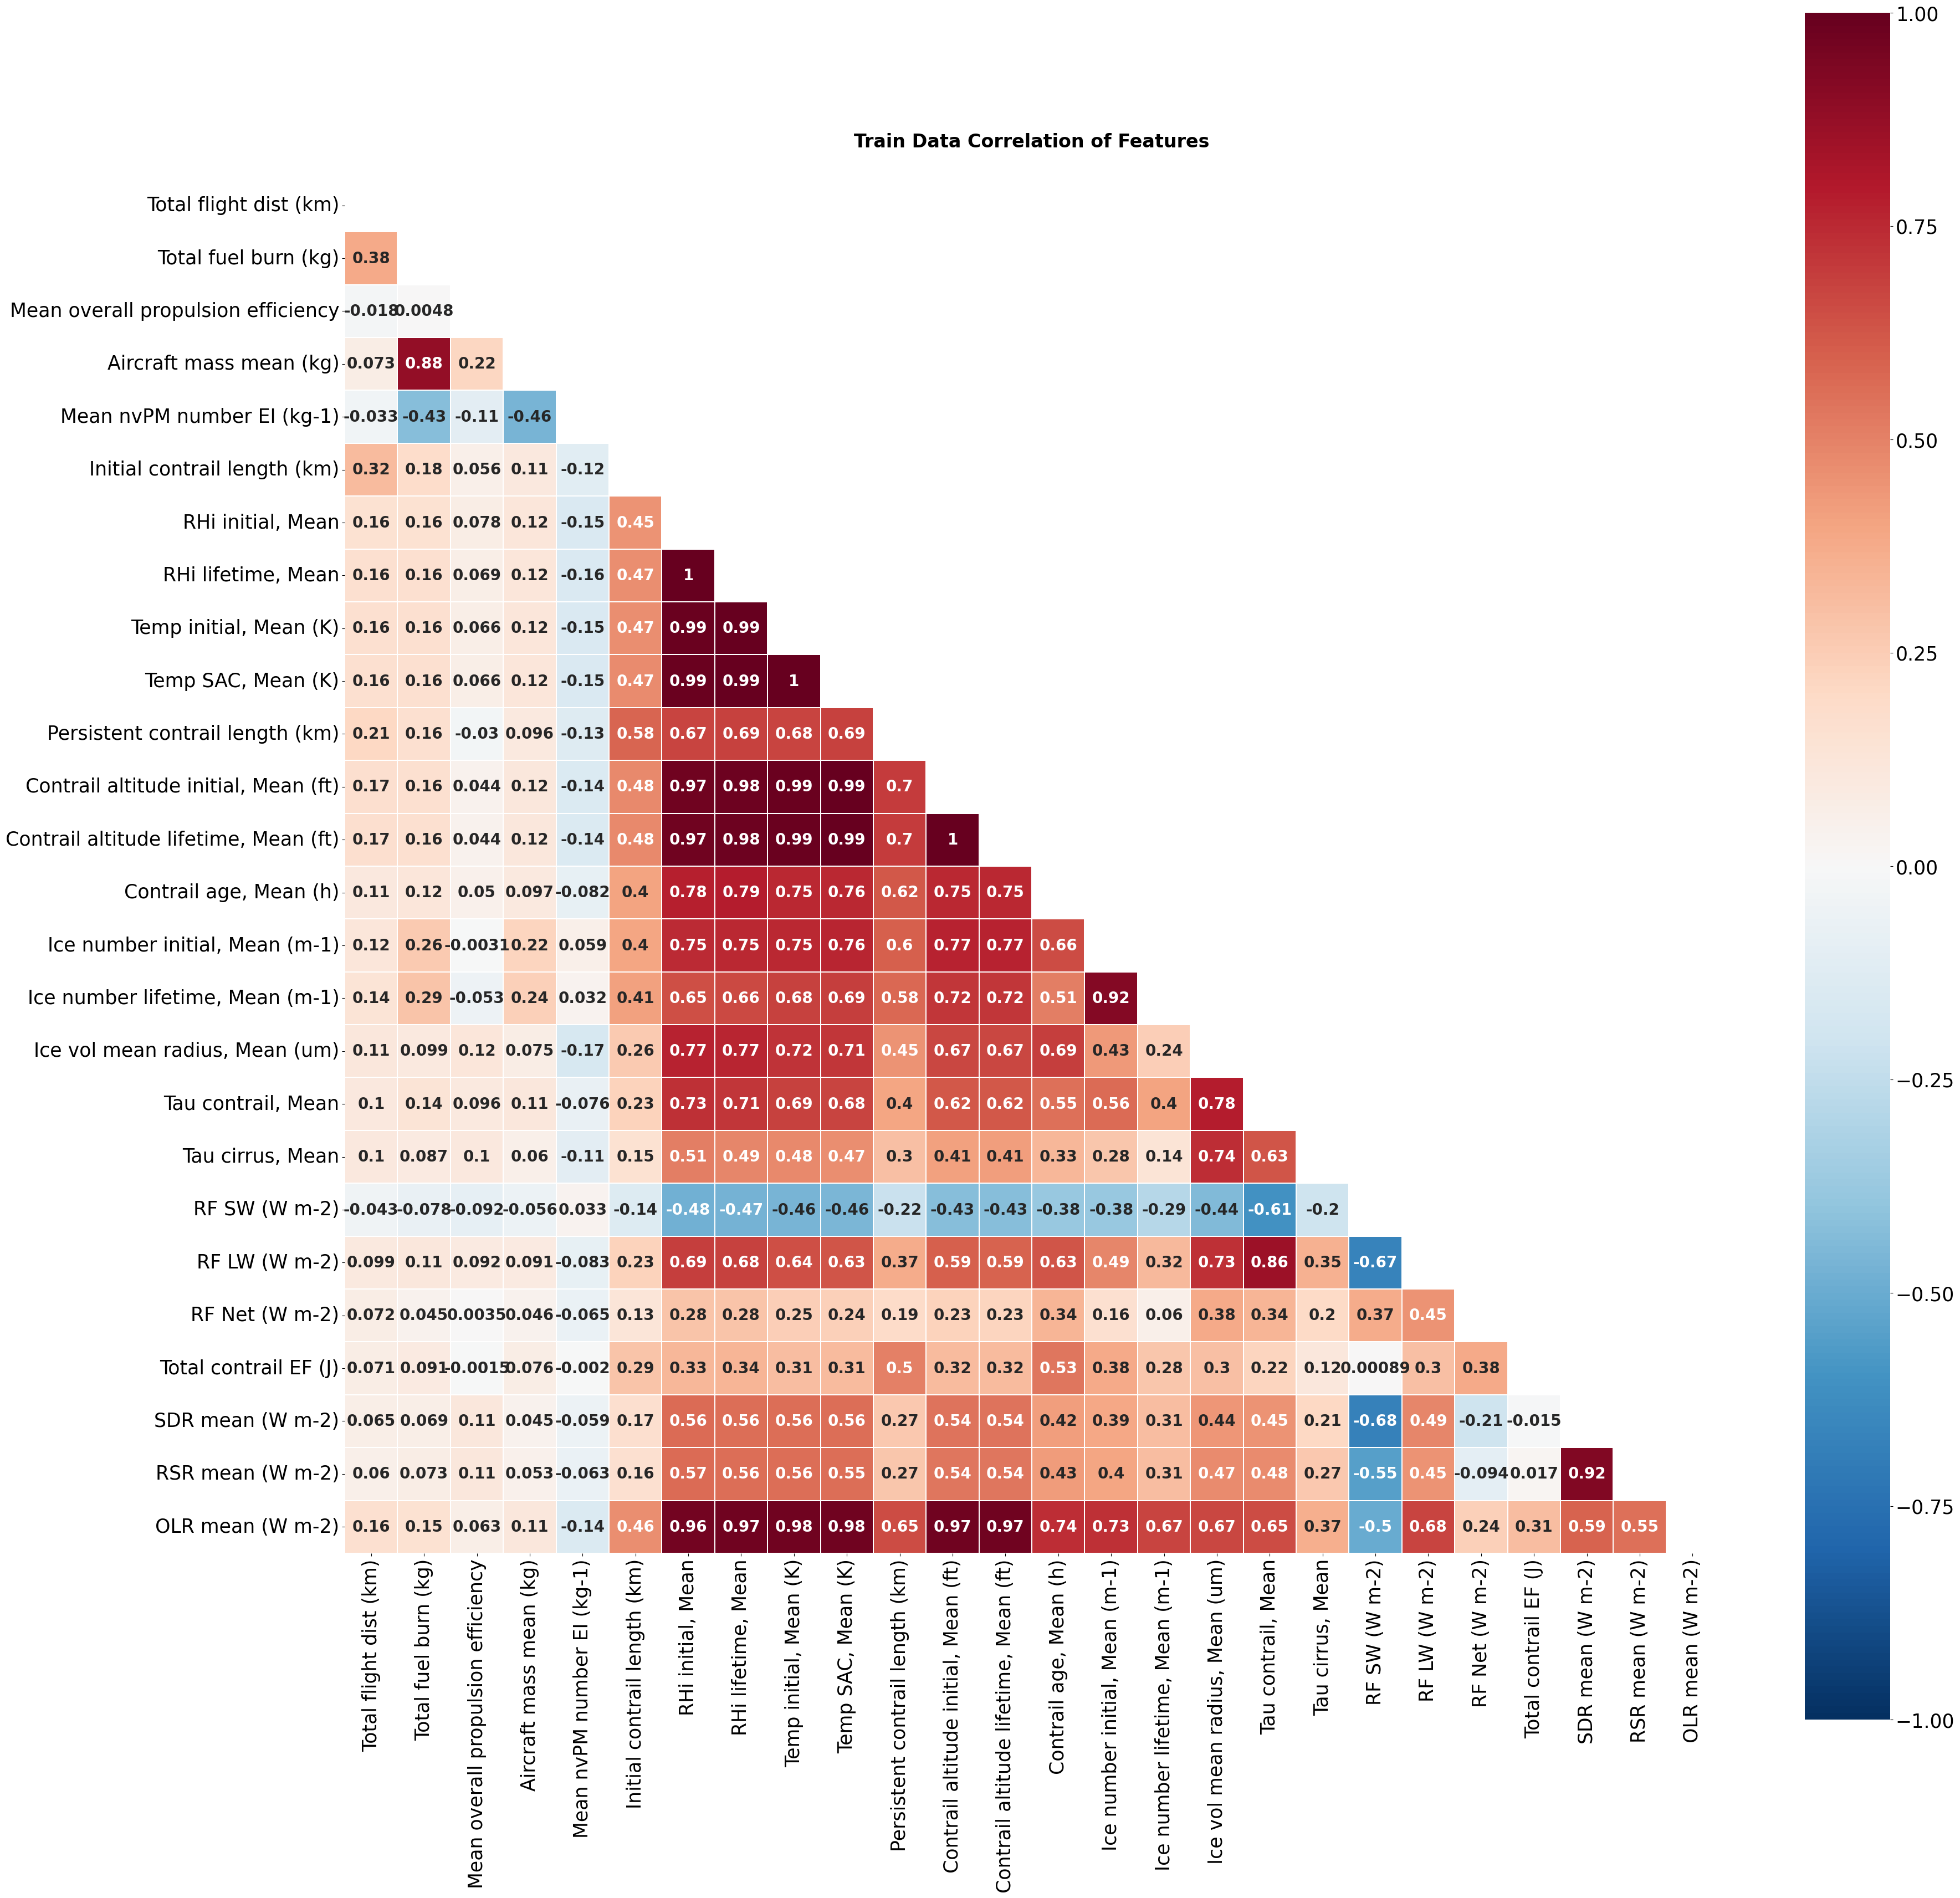

In [55]:
#correlation matrix

def plot_heatmap(df, title):
    # Create a mask for the diagonal elements
    mask = np.zeros_like(df.astype(float).corr())  
    mask[np.triu_indices_from(mask)] = True

    # Set the colormap and figure size
    colormap = plt.cm.RdBu_r
    plt.figure(figsize=(40, 40))

    # Set the title and font properties
    plt.title(f'{title} Correlation of Features', fontweight='bold', y=1.02, size=18, fontsize=24)

    # Plot the heatmap with the masked diagonal elements
    ax = sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1.0, 
                square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 20, "weight": "bold"},
                mask=mask)
    ax.tick_params(axis='both', labelsize=25) #axis font size

    cbar = ax.collections[0].colorbar #cbar font size
    cbar.ax.tick_params(labelsize=25)

    plt.show()

plot_heatmap(df_train, title='Train Data')  #plot df_train X&Y

## 3. preprocessing/standardisation/pca

In [38]:
#standardise features

sc = StandardScaler()
sc.fit(X_train)  #fit X_train to standadise for both X_train & X_dev
# print("Mean: ", sc.mean_, '\nVariance: ', sc.var_)

X_train_std = sc.transform(X_train)
X_dev_std = sc.transform(X_dev)

In [39]:
#pca to preserve variation in features

np.random.seed(1)

pca = PCA(n_components=2, random_state=0) 
X_train_pca = pca.fit_transform(X_train_std)
X_dev_pca = pca.transform(X_dev_std)

pd.DataFrame(X_train_pca).head()

,0,1
0,3.242755,-0.687313
1,-3.754870,0.622197
2,3.281309,-1.747422
3,-4.099829,3.410074
4,-4.051381,3.132650


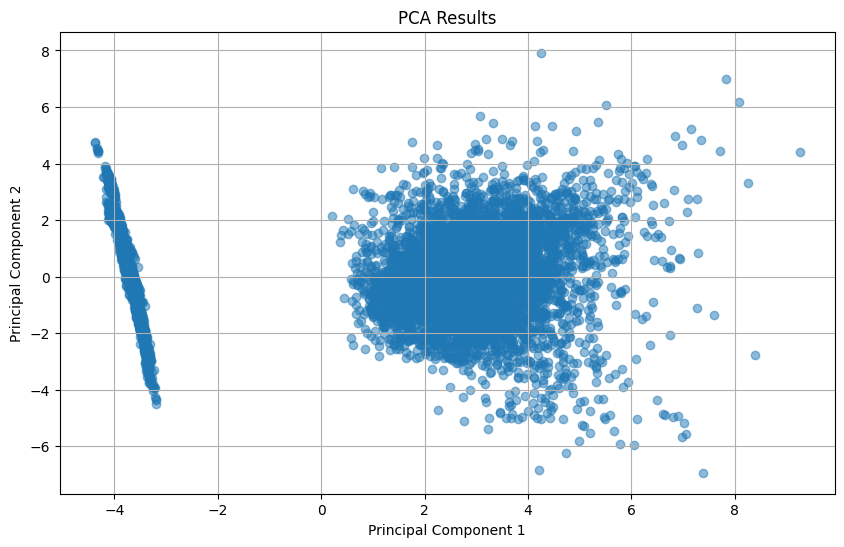

In [42]:
#pca visual
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.grid(True)
plt.show()

In [46]:
#pca (12 components)

np.random.seed(1)

pca = PCA(n_components=12, random_state=0) 
X_train_pca = pca.fit_transform(X_train_std)
X_dev_pca = pca.transform(X_dev_std)

pd.DataFrame(X_train_pca).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.242755,-0.687313,-1.710230,-0.433681,0.456388,-0.165032,0.273693,-1.467580,0.219350,0.825740,-0.755110,-1.036657
1,-3.754870,0.622197,-0.242117,0.128698,-0.053714,0.206413,-0.220627,0.060253,-0.008786,0.014554,0.114760,-0.057926
2,3.281309,-1.747422,2.899620,-2.128357,0.910747,-0.879854,-0.174367,-0.342511,0.346486,-2.546340,1.414478,0.139120
3,-4.099829,3.410074,-2.035277,-1.256421,1.730858,0.907216,-1.164519,0.961919,-0.002109,-1.061963,-1.498167,0.504371
4,-4.051381,3.132650,-2.078723,-1.522355,3.091005,0.374749,-0.945302,0.434802,0.054178,-0.892899,-1.312652,0.411501


[0.49189512 0.09506725 0.08635861 0.07209614 0.04449488 0.04248889
 0.03740589 0.03534952 0.02793266 0.02624605 0.01464839 0.0111918 ]
0.9851751867447582


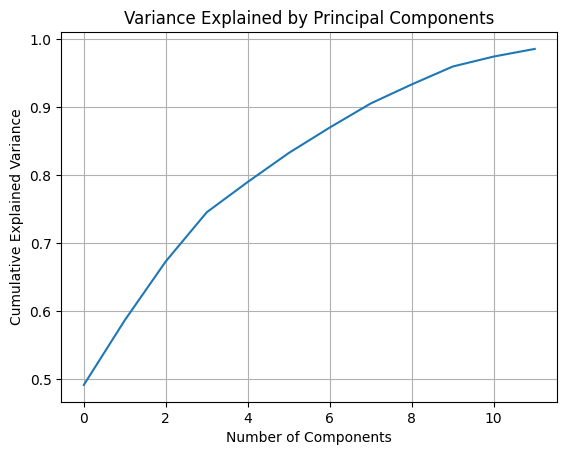

In [68]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print(explained_variance.sum())  #total variance captured by pca components - 98.5%

cumulative_variance = np.cumsum(explained_variance)
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Variance Explained by Principal Components')
plt.grid(True)
plt.show()

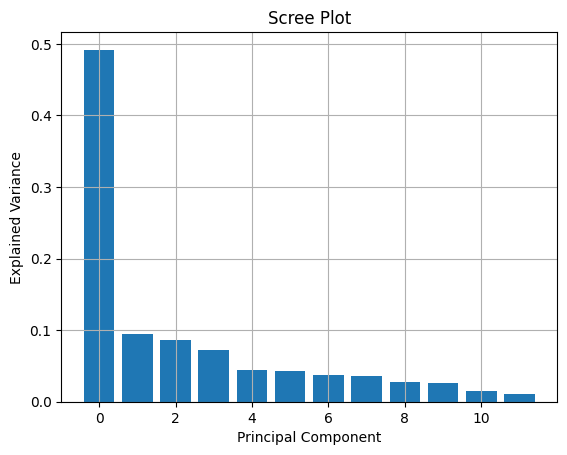

In [52]:
loadings = pca.components_
# loadings  #A high +ve/-ve loading indicates that the feature has a strong influence on that component

#explained variance by each principal component (decreasing order indicates more components do NOT add much explanatory power)
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

### tsne - interrupted ---->

In [ ]:
# #tsne - interrupted

# np.random.seed(1)
# tsne = TSNE(n_components=2, random_state=0)
# X_train_tsne = tsne.fit_transform(X_train_std)

# pd.DataFrame(X_train_tsne).head()

# #tsne
# plt.figure(figsize=(10, 6))
# plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], alpha=0.5)
# plt.xlabel('t-SNE dimension 1')
# plt.ylabel('t-SNE dimension 2')
# plt.title('t-SNE Results')
# plt.grid(True)
# plt.show()

In [ ]:
# #tsne plot

# data = []
# params = []
# for i in (5, 10, 15, 20):
#     for j in (250, 500):
#         n_components = 2
#         tsne = TSNE(n_components, perplexity = i, learning_rate = 10, n_iter = j)
#         tsne_result = tsne.fit_transform(features_train)
#         tsne_result.shape

#         tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0],
#                                         'tsne_2': tsne_result[:,1],
#                                         'label': target_train})
#         data.append(tsne_result_df)
#         params.append((i, j))

In [ ]:
# fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(35,35))
# for idx, ax in enumerate(axes.flatten()):
#         sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=data[idx], ax=ax,s=120)
#         lim = (tsne_result.min()-5, tsne_result.max()+5)
#         ax.set_xlim(lim)
#         ax.set_ylim(lim)
#         ax.set_aspect('equal')
#         ax.set_title(params[idx])
#         # ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
# plt.tight_layout()
# # plt.savefig('./images/tsne.png', dpi=300)

### <---- tsne - interrupted

## 4. modelling

### baseline - majority vote

In [58]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
print("Accuracy with Majority Class Baseline:", dummy_clf.score(X_train, y_train), dummy_clf.score(X_dev, y_dev)) 

# #w pca - same result
# dummy_clf.fit(X_train_pca, y_train)
# print("Accuracy with Majority Class Baseline (pca):", dummy_clf.score(X_train_pca, y_train), dummy_clf.score(X_dev_pca, y_dev)) 

Accuracy with Majority Class Baseline: 0.9155555555555556 0.908


### random forest

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf = RandomForestClassifier(random_state=0)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

#print the best parameters
print(grid_search.best_params_)
print(f"The mean accuracy of a model with these hyperparameters is: {grid_search.best_score_}")

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
The mean accuracy of a model with these hyperparameters is: 0.9248888888888889


In [66]:
tf.random.set_seed(1)
np.random.seed(1)

# rf = RandomForestClassifier(random_state=0)  #1 vs .92
# rf = RandomForestClassifier(random_state=0, class_weight='balanced')  #1 vs .91
# rf = RandomForestClassifier(random_state=0, n_estimators = 50)  #1 vs .89
# rf = RandomForestClassifier(random_state=0, bootstrap = False)  #1 vs .92
# rf = RandomForestClassifier(random_state=0, max_depth = 10)  #1 vs .93
rf = RandomForestClassifier(random_state=0, min_samples_split = 5, n_estimators = 100)  #1 vs .93
# rf = RandomForestClassifier(random_state=0,
#     n_estimators = 50,
#     max_depth = 10,
#     min_samples_split = 2)  #1 vs .91  #GridSearchCV tuned

rf.fit(X_train, y_train)

print ('Accuracy:', rf.score(X_train, y_train), rf.score(X_dev, y_dev))

Accuracy: 0.9937777777777778 0.919
